
# 2D Image Filtering using Butterworth Filter

This repository contains a Python implementation for 2D image filtering using the Butterworth filter. The Butterworth filter is a type of signal processing filter designed to have as flat a frequency response as possible in the passband. It is particularly well-suited for applications in image processing.

## Key Features
- Implementation of Butterworth Low-Pass Filter (LPF) in both Numpy and PyTorch.
- Functionality for filtering images with user-defined filter size, cutoff frequency, and order.
- Support for both single-channel and multi-channel (RGB) images.
- Visualization of original, low-pass filtered, and high-pass filtered images.

## Usage
This codebase is divided into three main parts:
1. **Function Definitions**: Contains functions for creating Butterworth LPF, and applying filtering on images using Numpy.
2. **Filtering and Visualization**: Demonstrates the application of filters on images and visualizes the results using matplotlib.
3. **PyTorch Implementation**: An alternative implementation using PyTorch for GPU-accelerated filtering.

## Requirements
- Python 3.x
- Numpy
- Matplotlib
- PyTorch
- torchvision
- PIL

Feel free to explore and modify the code to suit your specific image processing needs!


## Download Images

In [4]:
! wget https://i5.walmartimages.com/asr/d9831496-67c8-45f1-b731-b7c3f59a546c_1.dbfc373a3251bed10be5ee70879c5550.jpeg -O bear.jpg
! wget https://github.com/minkyu-choi04/Perceptual_Losses_for_Real_Time_Style_Transfer/raw/master/content.jpg -O scene.jpg

--2023-11-12 21:13:25--  https://i5.walmartimages.com/asr/d9831496-67c8-45f1-b731-b7c3f59a546c_1.dbfc373a3251bed10be5ee70879c5550.jpeg
Resolving i5.walmartimages.com (i5.walmartimages.com)... 151.101.1.74, 151.101.65.74, 151.101.129.74, ...
Connecting to i5.walmartimages.com (i5.walmartimages.com)|151.101.1.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 206865 (202K) [image/jpeg]
Saving to: ‘bear.jpg’

bear.jpg            100%[===================>] 202.02K  --.-KB/s    in 0.04s   

2023-11-12 21:13:25 (4.82 MB/s) - ‘bear.jpg’ saved [206865/206865]

--2023-11-12 21:13:25--  https://github.com/minkyu-choi04/Perceptual_Losses_for_Real_Time_Style_Transfer/raw/master/content.jpg
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/minkyu-choi04/Perceptual_Losses_for_Real_Time_Style_Transfer/master/conte

## Import libraries

In [5]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

## Visualize Images

Image sizes:  (128, 128, 3)


Text(0.5, 1.0, 'image2')

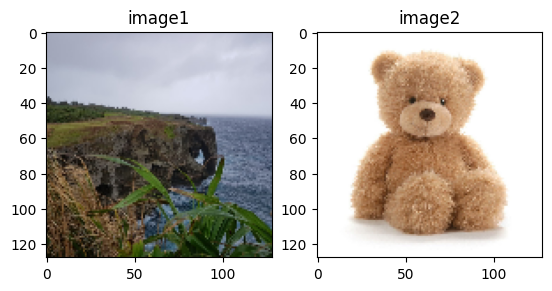

In [6]:
img_size = 128

path_img = "scene.jpg"
img = cv2.imread(path_img)
img1 = cv2.resize(img, (img_size,img_size))

path_img = "bear.jpg"
img = cv2.imread(path_img)
img2 = cv2.resize(img, (img_size,img_size))

print('Image sizes: ', np.shape(img1))
fig, ax = plt.subplots(ncols=2)
ax[0].imshow(img1[..., ::-1])
ax[0].set_title('image1')
ax[1].imshow(img2[..., ::-1])
ax[1].set_title('image2')

## Functions - Python

In [13]:
def get_Butterworth_LPF(img_size, freq_cutoff, n_order):
  M,N = img_size
  H = np.zeros((M,N), dtype=np.float32)
  D0 = freq_cutoff # cut of frequency
  n = n_order # order
  for u in range(M):
      for v in range(N):
          D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
          H[u,v] = 1 / (1 + (D/D0)**n)
  return H

def do_filtering_each_channel(img, filter):
  x = img
  F = np.fft.fft2(x)
  Fshift = np.fft.fftshift(F)
  Gshift = Fshift * filter
  G = np.fft.ifftshift(Gshift)
  g = np.abs(np.fft.ifft2(G))

  return g

def do_filtering_all_channels(img, filter):
  ''' Perform Butterworth filtering for all channels
  Args:
    img: np array, Assume channel comes first (3, H, W), pixel range 0~255.
    filter: Butterworth filter for low-pass
  Returns:
    img_LPF: results of loss pass filtering
    img_HPF: results of high pass filtering
  '''
  img_LPF = np.zeros(np.shape(img))
  for channel in range(3):
    print(np.shape(img[channel, :, :]))
    img_LPF[channel,:, :] = do_filtering_each_channel(img[channel, :, :], filter)

  return img_LPF

def do_filtering_all_channels_channelLast(img, filter):
  ''' Perform Butterworth filtering for all channels
  Args:
    img: np array, Assume channel comes first (H, W, 3), pixel range 0~255.
    filter: Butterworth filter for low-pass
  Returns:
    img_LPF: results of loss pass filtering
    img_HPF: results of high pass filtering
  '''
  img_LPF = np.zeros(np.shape(img))
  for channel in range(3):
    print(np.shape(img[:, :, channel]))
    img_LPF[:, :, channel] = do_filtering_each_channel(img[:, :, channel], filter)

  return img_LPF

def spatial_filtering(img, filter, isChannelLast=False):
  if isChannelLast:
    img_LPF = do_filtering_all_channels_channelLast(img, filter)
    return img_LPF
  else:
    img = change_axis_channel_first(img)
    img_LPF = do_filtering_all_channels(img, filter)
    return change_axis_channel_last(img_LPF)

def change_axis_channel_first(img):
  return np.transpose(img, (2, 0, 1))

def change_axis_channel_last(img):
  return np.transpose(img, (1, 2, 0))

## Perform spatial filtering

(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)


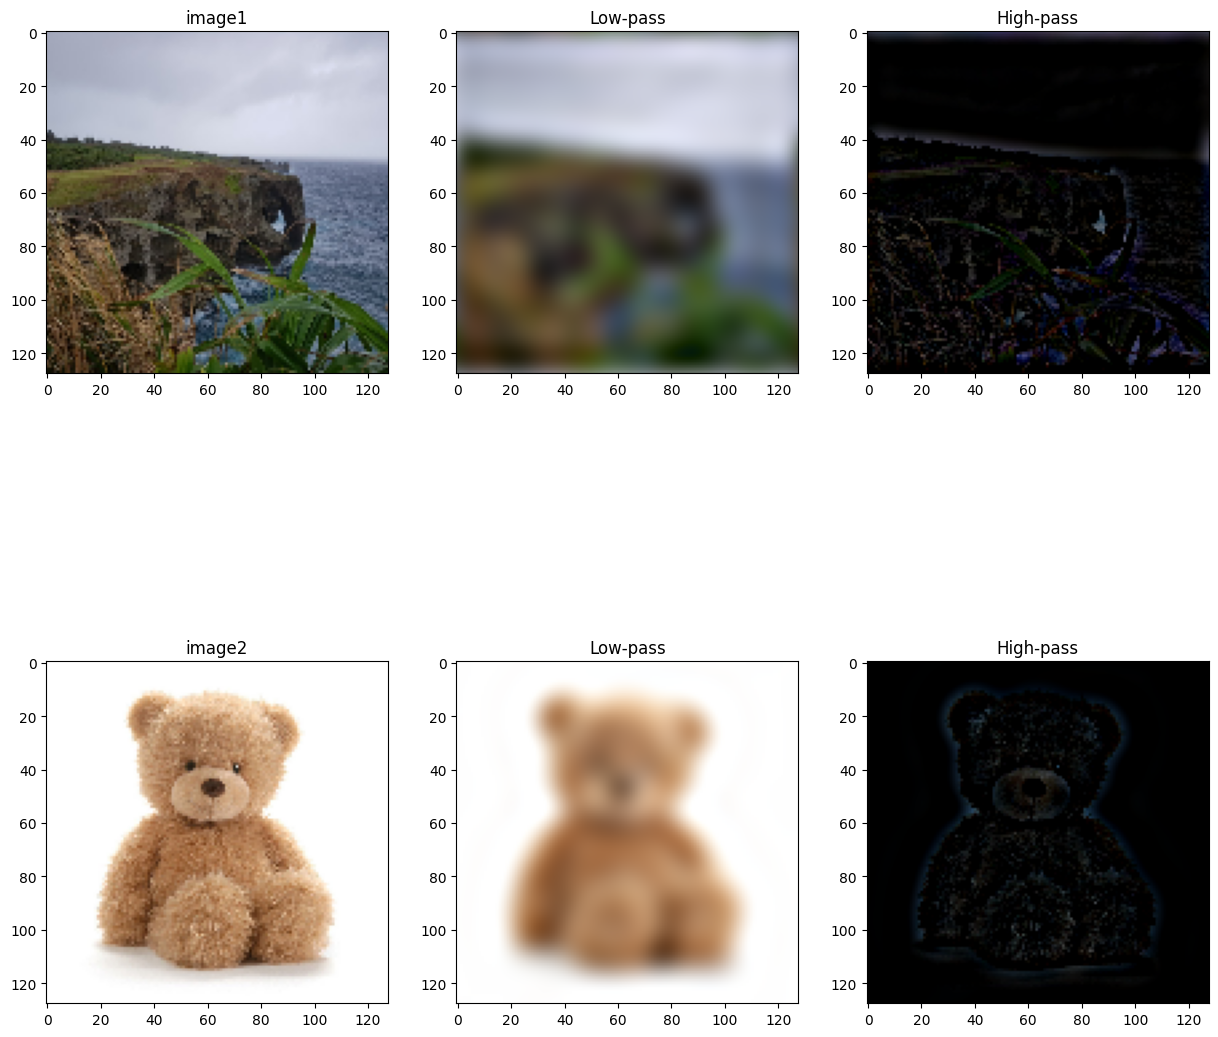

In [14]:
import matplotlib.pyplot as plt

# Assuming `img1` and `img2` are predefined image arrays
filter = get_Butterworth_LPF(np.shape(img1)[:2], 8, 8)

# Apply spatial filtering and obtain high-pass filtered images
img1_LPF = spatial_filtering(img1, filter)
img1_HPF = np.maximum(0, img1 - img1_LPF)
img2_LPF = spatial_filtering(img2, filter)
img2_HPF = np.maximum(0, img2 - img2_LPF)

# Visualization
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(15, 15))
for i, (orig, lpf, hpf, title) in enumerate(zip([img1, img2], [img1_LPF, img2_LPF], [img1_HPF, img2_HPF], ['image1', 'image2'])):
    ax[i, 0].imshow(orig[..., ::-1])
    ax[i, 0].set_title(title)
    ax[i, 1].imshow(lpf[..., ::-1] / 255.0)
    ax[i, 1].set_title('Low-pass')
    ax[i, 2].imshow(hpf[..., ::-1] / 255.0)
    ax[i, 2].set_title('High-pass')
plt.show()


# Pytorch version filtering

In [15]:
import torch
from torchvision import transforms
from collections.abc import Iterable  # Corrected import statement

from PIL import Image

def pil_loader(path):
    with open(path, 'rb') as f:
        with Image.open(f) as img:
            return img.convert('RGB')

def get_Butterworth_LPF(img_size, freq_cutoff, n_order):
  M,N = img_size
  H = np.zeros((M,N), dtype=np.float32)
  D0 = freq_cutoff # cut of frequency
  n = n_order # order
  for u in range(M):
      for v in range(N):
          D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
          H[u,v] = 1 / (1 + (D/D0)**n)
  return H

def do_filtering_all_channel(img, filter):
  '''
  Args:
    img: (b, c, h, w)
    filter: (h, w)

  Returns:
    img_LPF: results of loss pass filtering
  '''
  x = img
  Fshift = torch.fft.fftshift(torch.fft.fft2(x), dim=[2,3]) # (b, c, h, w)
  Gshift = Fshift * filter.unsqueeze(0).unsqueeze(0)
  G = torch.fft.ifft2(torch.fft.ifftshift(Gshift, dim=[2,3]))
  g = torch.abs(G)
  return g


def pil_loader(path):
    with open(path, 'rb') as f:
        with Image.open(f) as img:
            return img.convert('RGB')

class Normalize_01:
    def __init__(self, mean=[0.0, 0.0, 0.0], std=[1.0, 1.0, 1.0]):
        self.mean = mean
        self.std = std
    def __call__(self, imgmap):
        normalize = transforms.Normalize(mean=self.mean, std=self.std)
        return [normalize(i) for i in imgmap]

class Scale:
    def __init__(self, size, interpolation=Image.NEAREST):
        assert isinstance(size, int) or (isinstance(size, Iterable) and len(size) == 2)
        self.size = size
        self.interpolation = interpolation

    def __call__(self, imgmap):
        # assert len(imgmap) > 1 # list of images
        img1 = imgmap[0]
        if isinstance(self.size, int):
            w, h = img1.size
            if (w <= h and w == self.size) or (h <= w and h == self.size):
                return imgmap
            if w < h:
                ow = self.size
                oh = int(self.size * h / w)
                return [i.resize((ow, oh), self.interpolation) for i in imgmap]
            else:
                oh = self.size
                ow = int(self.size * w / h)
                return [i.resize((ow, oh), self.interpolation) for i in imgmap]
        else:
            return [i.resize(self.size, self.interpolation) for i in imgmap]

class ToTensor:
    def __call__(self, imgmap):
        totensor = transforms.ToTensor()
        return [totensor(i) for i in imgmap]

Image sizes:  (720, 960, 3)


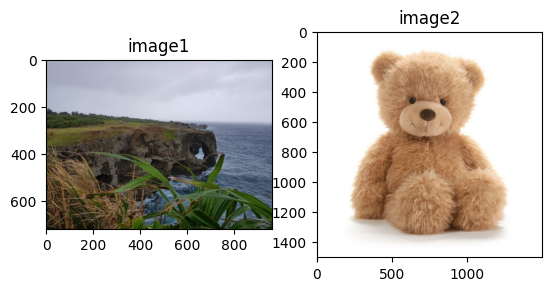

In [17]:
img_size = 64
transform = transforms.Compose([
            Scale(size=(img_size, img_size)),
            ToTensor(),
            Normalize_01()
        ])

path_img = "scene.jpg"
img1 = pil_loader(path_img)

path_img = "bear.jpg"
img2 = pil_loader(path_img)

print('Image sizes: ', np.shape(img1))
fig, ax = plt.subplots(ncols=2)
ax[0].imshow(img1)
ax[0].set_title('image1')
ax[1].imshow(img2)
ax[1].set_title('image2')

imgs = [img1, img2]
imgs_t = torch.stack(transform(imgs))


Freq 6

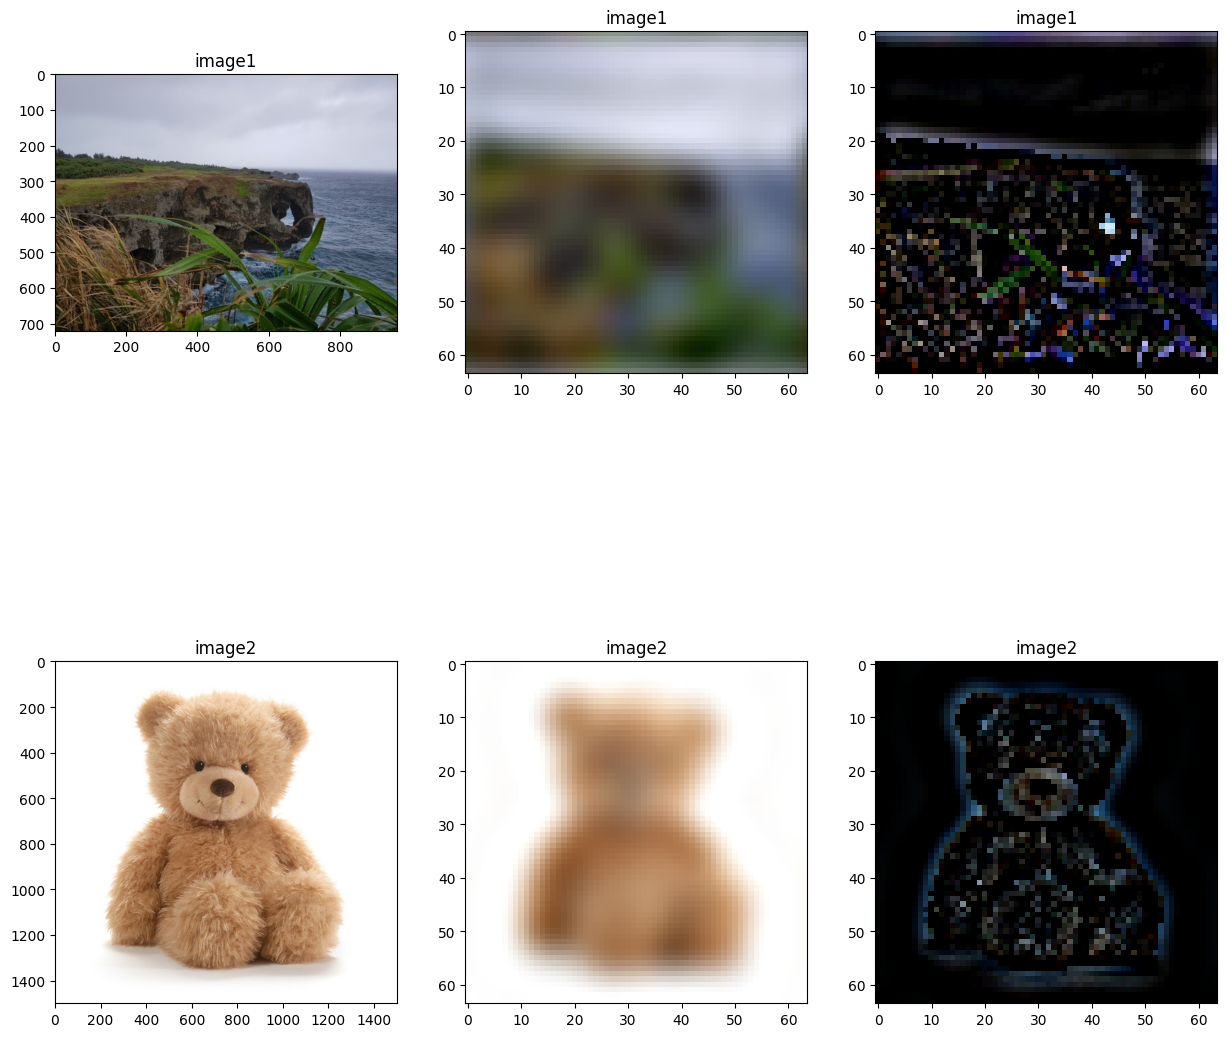

tensor(0.5326) tensor(0.)
tensor(1.0584) tensor(0.0029)


In [18]:
frq = 6
filter = get_Butterworth_LPF((img_size,img_size), frq, 8)
filter = torch.tensor(filter)

LPF_imgs = do_filtering_all_channel(imgs_t, filter)
HPF_imgs = np.maximum(0, imgs_t - LPF_imgs)

LPF_imgs_np = LPF_imgs.numpy()
LPF_imgs_np = np.transpose(LPF_imgs_np, (0, 2, 3, 1))
HPF_imgs_np = HPF_imgs.numpy()
HPF_imgs_np = np.transpose(HPF_imgs_np, (0, 2, 3, 1))

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(15, 15))
ax[0,0].imshow(img1)
ax[0,0].set_title('image1')
ax[0,1].imshow(LPF_imgs_np[0])
ax[0,1].set_title('image1')
ax[0,2].imshow(HPF_imgs_np[0]*2)
ax[0,2].set_title('image1')
ax[1,0].imshow(img2)
ax[1,0].set_title('image2')
ax[1,1].imshow(LPF_imgs_np[1])
ax[1,1].set_title('image2')
ax[1,2].imshow(HPF_imgs_np[1]*2)
ax[1,2].set_title('image2')
#plt.axis('off')
plt.show()

print(torch.max(HPF_imgs), torch.min(HPF_imgs))
print(torch.max(LPF_imgs), torch.min(LPF_imgs))



freq 9

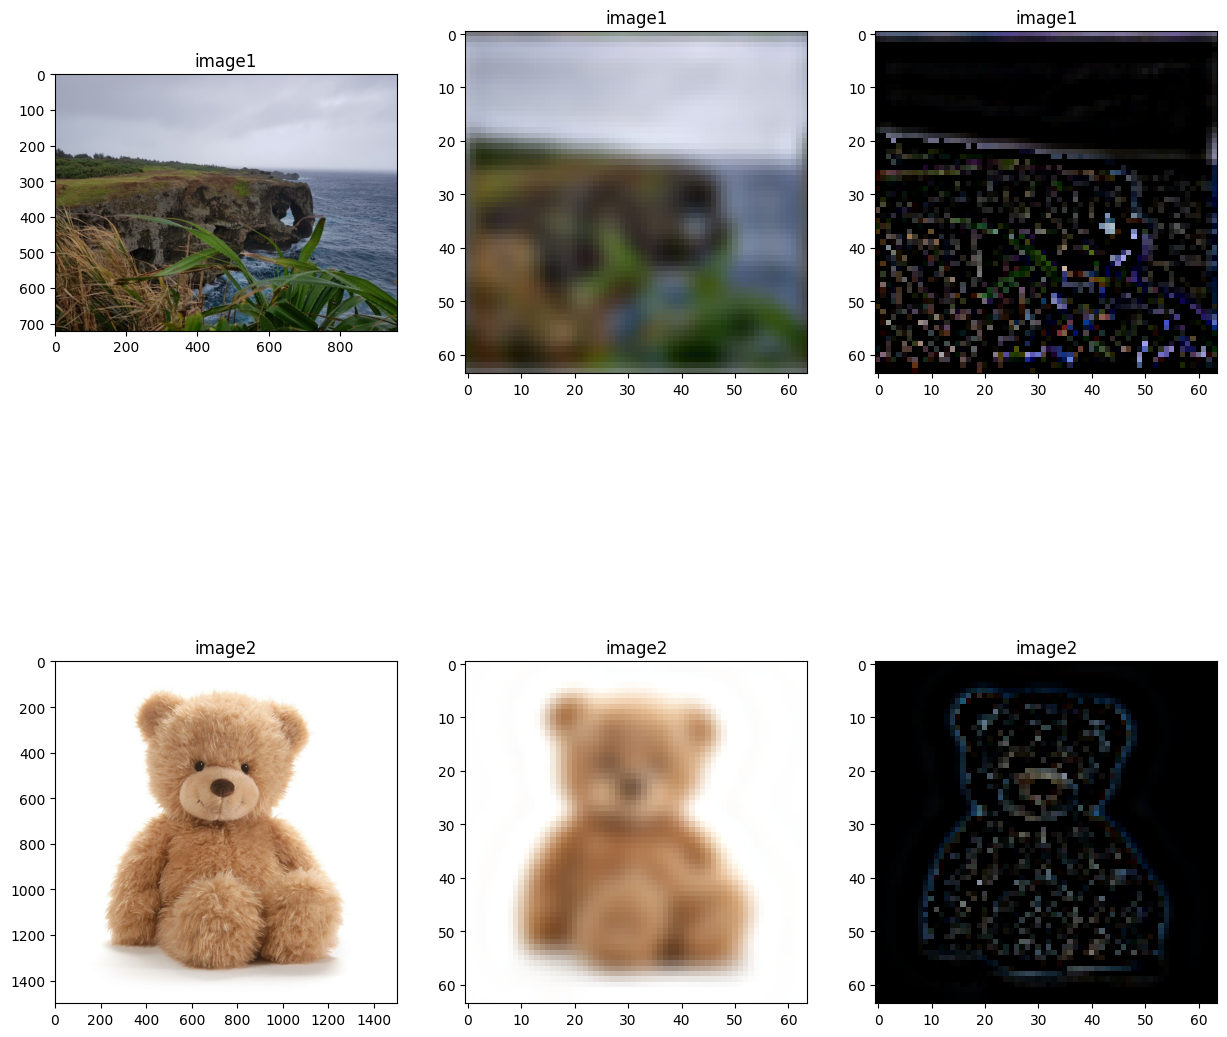

tensor(0.4738) tensor(0.)
tensor(1.0567) tensor(0.0005)


In [ ]:
frq = 9
filter = get_Butterworth_LPF((img_size,img_size), frq, 8)
filter = torch.tensor(filter)

LPF_imgs = do_filtering_all_channel(imgs_t, filter)
HPF_imgs = np.maximum(0, imgs_t - LPF_imgs)

LPF_imgs_np = LPF_imgs.numpy()
LPF_imgs_np = np.transpose(LPF_imgs_np, (0, 2, 3, 1))
HPF_imgs_np = HPF_imgs.numpy()
HPF_imgs_np = np.transpose(HPF_imgs_np, (0, 2, 3, 1))

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(15, 15))
ax[0,0].imshow(img1)
ax[0,0].set_title('image1')
ax[0,1].imshow(LPF_imgs_np[0])
ax[0,1].set_title('image1')
ax[0,2].imshow(HPF_imgs_np[0]*2)
ax[0,2].set_title('image1')
ax[1,0].imshow(img2)
ax[1,0].set_title('image2')
ax[1,1].imshow(LPF_imgs_np[1])
ax[1,1].set_title('image2')
ax[1,2].imshow(HPF_imgs_np[1]*2)
ax[1,2].set_title('image2')
#plt.axis('off')
plt.show()

print(torch.max(HPF_imgs), torch.min(HPF_imgs))
print(torch.max(LPF_imgs), torch.min(LPF_imgs))



freq 12

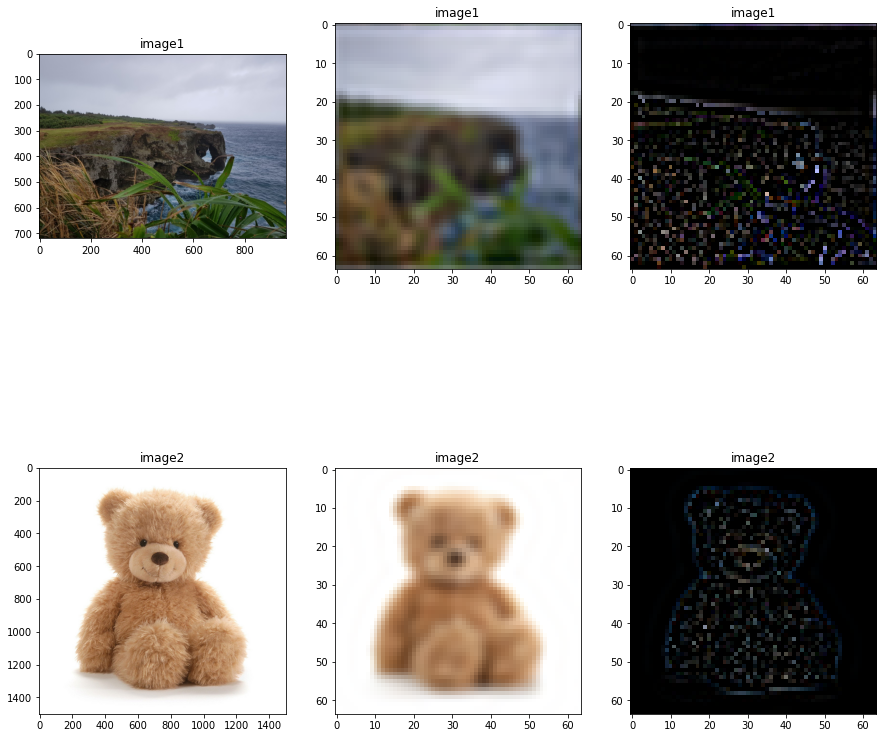

tensor(0.5021) tensor(0.)
tensor(1.0492) tensor(0.0006)


In [ ]:
frq = 12
filter = get_Butterworth_LPF((img_size,img_size), frq, 8)
filter = torch.tensor(filter)

LPF_imgs = do_filtering_all_channel(imgs_t, filter)
HPF_imgs = np.maximum(0, imgs_t - LPF_imgs)

LPF_imgs_np = LPF_imgs.numpy()
LPF_imgs_np = np.transpose(LPF_imgs_np, (0, 2, 3, 1))
HPF_imgs_np = HPF_imgs.numpy()
HPF_imgs_np = np.transpose(HPF_imgs_np, (0, 2, 3, 1))

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(15, 15))
ax[0,0].imshow(img1)
ax[0,0].set_title('image1')
ax[0,1].imshow(LPF_imgs_np[0])
ax[0,1].set_title('image1')
ax[0,2].imshow(HPF_imgs_np[0]*2)
ax[0,2].set_title('image1')
ax[1,0].imshow(img2)
ax[1,0].set_title('image2')
ax[1,1].imshow(LPF_imgs_np[1])
ax[1,1].set_title('image2')
ax[1,2].imshow(HPF_imgs_np[1]*2)
ax[1,2].set_title('image2')
#plt.axis('off')
plt.show()

print(torch.max(HPF_imgs), torch.min(HPF_imgs))
print(torch.max(LPF_imgs), torch.min(LPF_imgs))

